---
# 프로젝트 명: MLB 데이터를 활용한 회귀모델 생성 및 결과분석

## 데이터 출처: [Moneyball | Kaggle](https://www.kaggle.com/wduckett/moneyball-mlb-stats-19622012)

## 프로젝트 목표
    MLB Moneyball 데이터와 강의 실습시간에 배운 내용으로 회귀분석 및 로지스틱회귀분석 모델 생성
        - 한 시즌 동안 승리한 횟수(W) 예측 회귀분석 모델, 플레이오프 진출 여부(Playoffs) 결정 로지스틱회귀분석 모델 생성
    독립변수들과 종속변수와의 인과관계를 고려하여 모델에 영향력이 큰 유의미한 독립변수 찾기
        - 기존의 독립변수를 조합하여 만든 변수로 예측해보기
        - 변수선택법(전진선택법, 후진소거법)으로 최적의 변수 조합 찾기
        - 다중공선성 문제 확인
    회귀모델의 결과를 해석하는 방법 습득

## 프로젝트 구성
    - 시각화를 통한 데이터의 이해
    - RS를 독립변수로 W를 예측하는 단순선형회귀 모델 생성
    - (RS-RA)를 독립변수로 W를 예측하는 단순선형회귀 모델 생성
    - 회귀분석 결과의 해석
    - 모든 변수를 활용한 다중회귀분석 및 다중공선성 문제
    - 로지스틱회귀 모델 생성
    - 변수 선택법으로 로지스틱회귀분석 정확도 올리기

## 프로젝트 과정
    - 데이터의 간단한 시각화에서부터 회귀분석과 로지스틱회귀분석 문제 해결까지 강의 실습 내용 확인
    - 모델 생성 및 해석에 대한 내용에 집중하기 위해서 학습데이터와 테스트데이터를 구분하지 않고 진행
    - 강의 실습 시간에 다룬 자료를 이용해서 코드 작성

- 작성자: 김민중 감수자

---

### Context

In the early 2000s, Billy Beane and Paul DePodesta worked for the Oakland Athletics. While there, they literally changed the game of baseball. They didn't do it using a bat or glove, and they certainly didn't do it by throwing money at the issue; in fact, money was the issue. They didn't have enough of it, but they were still expected to keep up with teams that had much deeper pockets. This is where Statistics came riding down the hillside on a white horse to save the day. This data set contains some of the information that was available to Beane and DePodesta in the early 2000s, and it can be used to better understand their methods.

### Content

This data set contains a set of variables that Beane and DePodesta focused heavily on. They determined that stats like on-base percentage (OBP) and slugging percentage (SLG) were very important when it came to scoring runs, however they were largely undervalued by most scouts at the time. This translated to a gold mine for Beane and DePodesta. Since these players weren't being looked at by other teams, they could recruit these players on a small budget. The variables are as follows:

- Team, 팀
- League, 리그
- Year, 연도
- Runs Scored (RS), 득점 수
- Runs Allowed (RA), 실점 수
- Wins (W), 승리 횟수
- On-Base Percentage (OBP), 출루율
- Slugging Percentage (SLG), 장타율
- Batting Average (BA), 타율
- Playoffs (binary), 플레이오프 진출 여부
- RankSeason, 시즌 순위
- RankPlayoffs 플레이오프 순위
- Games Played (G), 경기 수
- Opponent On-Base Percentage (OOBP), 도루 허용률
- Opponent Slugging Percentage (OSLG), 피장타율

### [Baseball statistics](https://en.wikipedia.org/wiki/Baseball_statistics)을 살펴보면 각 변수의 정확한 의미를 파악할 수 있다.

# 아래 코드를 실행해주세요.

In [2]:
# 참고: 프로젝트 출제자의 Python 및 주요 라이브러리 버전

import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sys

print("python version: ", sys.version)
print("pandas version: ", pd.__version__)
print("statsmodels version: ", sm.__version__)
print("numpy version: ", np.__version__)

%matplotlib inline

python version:  3.7.7 (default, Mar 26 2020, 10:32:53) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version:  1.0.5
statsmodels version:  0.11.1
numpy version:  1.18.5


In [5]:
# Kaggle의 정책상 프로젝트 참여자는 Kaggle에 직접 로그인해서 자료를 다운로드하는 것을 권합니다.
# moneyball = pd.read_csv("https://mjgim-fc.s3.ap-northeast-2.amazonaws.com/baseball.csv", encoding="utf8")

# 데이터 불러오기(자료는 data 폴더에 있음)
moneyball = pd.read_csv("./data/baseball.csv", encoding="utf8")
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
# 데이터의 간단한 정보 파악(na의 개수 및 데이터 타입)
moneyball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [7]:
# na가 있는 컬럼인 RankSeason, RankPlayoffs을 제거(프로젝트에서 사용 안 함)
moneyball = moneyball.dropna(axis=1)
moneyball.info()

# 1232개의 object와 11개의 변수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      1232 non-null   object 
 1   League    1232 non-null   object 
 2   Year      1232 non-null   int64  
 3   RS        1232 non-null   int64  
 4   RA        1232 non-null   int64  
 5   W         1232 non-null   int64  
 6   OBP       1232 non-null   float64
 7   SLG       1232 non-null   float64
 8   BA        1232 non-null   float64
 9   Playoffs  1232 non-null   int64  
 10  G         1232 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 106.0+ KB


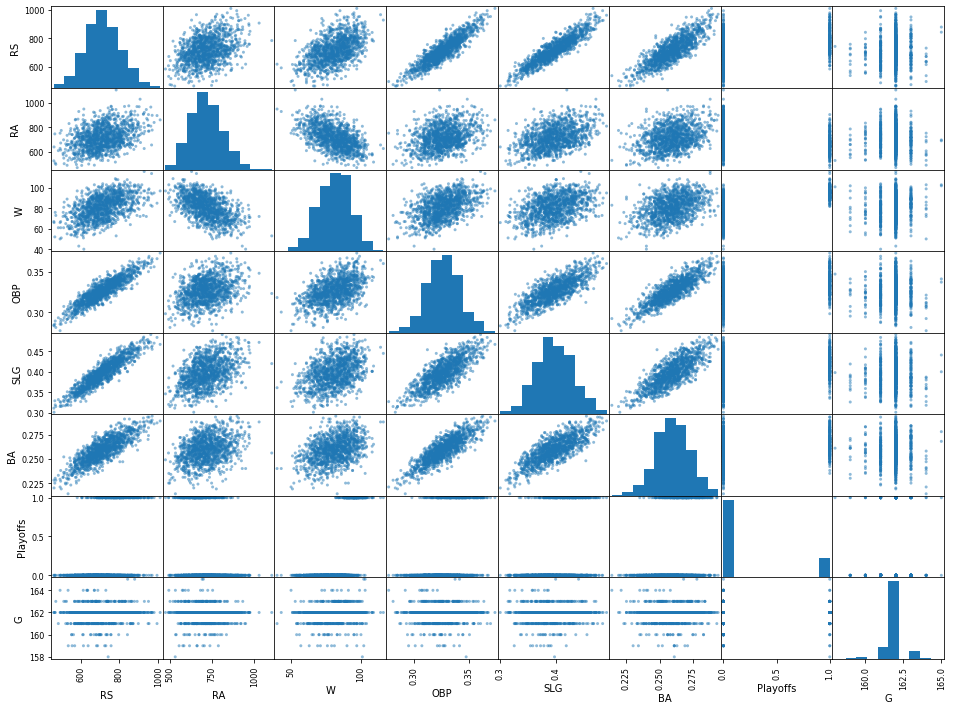

In [8]:
# Object 변수 및 불필요한 변수 제거해서 단순 시각화

selected_df = moneyball.select_dtypes(exclude=['object'])
selected_df = selected_df.drop(["Year"], axis=1)
_ = pd.plotting.scatter_matrix(selected_df,
                               alpha = 0.5, figsize=(16,12))

In [9]:
print(selected_df.Playoffs.unique())
print(selected_df.G.unique())
print(selected_df.mode())

[0 1]
[162 161 163 160 164 159 158 165]
    RS     RA     W    OBP    SLG     BA  Playoffs      G
0  682  717.0  83.0  0.322  0.401  0.263       0.0  162.0
1  691    NaN   NaN    NaN    NaN    NaN       NaN    NaN


## STEP 1. 시각화를 통한 데이터의 이해 
- 다양한 수치값을 갖는 변수들의 산포도를 보고 받은 통찰(insight)은 무엇인가?
- 상관관계를 보이는 데이터들은 존재하는가? 있다면 어떤 변수들이 어떤 관계에 있는지 대답하시오.
- 경기 수(G)의 히스토그램은 어떤 의미를 갖는가? 또한 다른 변수들의 히스토그램을 보고 해석하시오.

### [풀이] 
- 몇몇 데이터들이 강한 선형적 상관관계를 나타낸다.
- 출루율(OBP), 장타율(SLG), 타율(BA), RS(득점)은 강한 상관관계가 존재한다.
- 경기수(G)는 팀별로 각각 비슷하고 중 중간인 162가 가장 많다. playoffs는 진출여부를 묻고 이진변수이다. 다른변수들은 종모양을 이룬다.

---
>- ㄹㅣ뷰
   - 잘 분석해주셨습니다.
   - 조금 더 살펴보자면 RS는 OBP, SLG, BA와 강한 선형관계를 보이고 있네요
   - RA는 W와는 약한 음의 관계를 보이고 있네요

## STEP 2. RS를 독립변수로 W를 예측하는 단순선형회귀 모델 생성
- 가정: 시즌 총 득점(RS)이 승리에 영향을 줄 것이다.
- RS를 독립변수로 W를 예측한 단순선형모델 직선의 기울기 $\alpha$와 절편 $\beta$는 몇인가?

$$
W = \alpha RS + \beta
$$


- 해당 모델이 얼마나 적합한지를 평가하는 $R^2$는 몇 인가?
- 적당한 모델이라고 할 수 있는가?

### [풀이] 
- 
### RS로 단순회귀 결과
- 기울기  𝛼  = 0.0641
- 절편    𝛽  = 35.0964
- 적합도  R2 = 0.262
- 회귀계수의 p 값이 작으므로 식이 유효하나, 아직 모델의 적합도는 낮다

---
>- 리뷰
   - 잘 분석해주셨네요
   - p value 값으로는 모델의 적합도를 결정하긴 어렵습니다.
   - R squared 값이 0.262로 적당한 모델이라 말하기 어렵겠네요

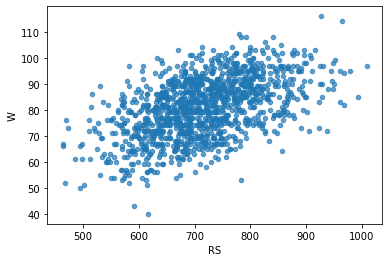

In [10]:
moneyball.plot.scatter(x = "RS", y = "W", alpha = 0.7)

In [11]:
# sm으로 fit한 모델명은 fit_simple_model 으로 하시오.
# RS로 단순회귀
rs = sm.add_constant(selected_df.RS, has_constant='add')
W = selected_df.W
simple_model = sm.OLS(W,rs)
fit_simple_model = simple_model.fit()
fit_simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     436.4
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           3.50e-83
Time:                        22:34:00   Log-Likelihood:                -4565.1
No. Observations:                1232   AIC:                             9134.
Df Residuals:                    1230   BIC:                             9144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0964      2.211     15.876      0.000      30.759      39.434
RS             0.0641      0.003     20.890      0.000       0.058       0.070
==============================================================================
Omnibus:                       14.041   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.799
Skew:                          -0.134   Prob(JB):                      0.00452
Kurtosis:                       2.627   Cond. No.                     5.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Linear Regression')

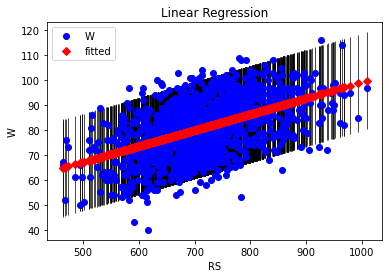

In [12]:
# 참고
# Fit된 직선 그리기. sm을 이용해서 선형회귀분석을 한 경우 
# 아래와 같이 간단한 코드로 적합된 직선과 원래 데이터의 그림을 그릴 수 있음.

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(fit_simple_model, 1, ax=ax)
ax.set_ylabel("W")
ax.set_xlabel("RS")
ax.set_title("Linear Regression")

### Comments
- 득점 RS로 W를 예측한 단순선형회귀분석의 적합도는 만족하기 어려움(R squared 값으로 판단).
- 시즌 총 실점 RA를 독립변수로 W를 예측하는 단순선형회귀분석의 결과는 어떠한가? 만족할 만한가? 
- RS를 RA로 변경해서 기울기와 절편 및 R squared를 구해보시오. 

### [풀이] 
- 
### RA로 단순회귀 결과
- 기울기  𝛼  = -0.0655
- 절편    𝛽  = 127.7690
- 적합도  R2 = 0.283
- 회귀계수의 p 값이 작으므로 식이 유효하나, 아직 모델의 적합도는 낮다

---
>- 리뷰
   - RA로 바꿔도 R2는 0.283으로 적당한 모델이라 부르기 힘들겠네요

In [13]:
# RA로 단순회귀
ra = sm.add_constant(selected_df.RA, has_constant='add')
W = selected_df.W
simple_model = sm.OLS(W,ra)
fit_simple_model = simple_model.fit()
fit_simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     486.5
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           4.06e-91
Time:                        22:34:06   Log-Likelihood:                -4546.8
No. Observations:                1232   AIC:                             9098.
Df Residuals:                    1230   BIC:                             9108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.7690      2.143     59.634      0.000     123.566     131.973
RA            -0.0655      0.003    -22.058      0.000      -0.071      -0.060
==============================================================================
Omnibus:                        5.903   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.615
Skew:                          -0.127   Prob(JB):                       0.0604
Kurtosis:                       2.789   Cond. No.                     5.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## STEP 3. (RS-RA)를 독립변수로 W를 예측하는 단순선형회귀 모델 생성
- 득점과 실점이 승리 수와 관련이 없을까? 경기에서 승리하려면 상대보다 득점을 많이 해야한다. 즉, (득점 - 실점)을 새로운 독립변수로 설정하고 W를 예측하는 단순선형회귀분석을 해보시오.
- 가정: 시즌 총 득점(RS)과 실점(RA)의 차이가 승리에 영향을 줄 것이다.
- 강의 실습 시간에 학습한 statsmodels 라이브러리를 이용해서 아래의 질문에 답하시오.
- (RS-RA)를 독립변수로 W를 예측한 단순선형모델의 기울기 $\alpha$와 절편 $\beta$는 몇인가?

$$
W = \alpha \cdot (RS-RA) + \beta
$$

- 해당 모델이 얼마나 적합한지를 평가하는 $R^2$는 몇 인가?
- 적당한 모델이라고 할 수 있는가?

### [풀이] 
### RARS로 단순회귀 결과
- RS-RA 기울기= 0.1045
- 절편       = 80.9042
- 적합도  R2 = 0.880
- 회귀계수의 p 값이 작으므로 식이 유효하고 모델의 적합도도 높다

---
>- 리뷰
   - RS-RA로 한 단순선형모델의 R squared 값은 0.88로 괜찮은 결과를 얻었네요
   - 말씀하신 바와 같이 적당한 모델이라 볼 수 있겠습니다.

In [14]:
RS_RA = sm.add_constant(selected_df['RS']-selected_df['RA'], has_constant='add')
W = selected_df.W
simple_model = sm.OLS(W,RS_RA)
fit_simple_model = simple_model.fit()
fit_simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     8983.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:34:07   Log-Likelihood:                -3448.3
No. Observations:                1232   AIC:                             6901.
Df Residuals:                    1230   BIC:                             6911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.9042      0.113    713.853      0.000      80.682      81.127
0              0.1045      0.001     94.778      0.000       0.102       0.107
==============================================================================
Omnibus:                        0.797   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.671   Jarque-Bera (JB):                0.686
Skew:                          -0.041   Prob(JB):                        0.710
Kurtosis:                       3.081   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## STEP 4. 회귀분석 결과의 해석
- 득점과 실점이 개별적으로 한 개씩만 본다면 승리 예측에 큰 영향을 주지 못하지만 (득점 - 실점)으로 결합한 변수는 승리 예측에 유의미하게 영향을 주었다. 이런 작용은 무엇이라고 하는가?
- 다시 RS, RA를 두 개의 독립변수로 W를 예측한 선형모델의 기울기 $\alpha_1$, $\alpha_2$와 절편 $\beta$는 몇인가?

$$
W = \alpha_1 RS + \alpha_2 RA + \beta
$$

- RS, RA를 두 개의 독립변수로 W를 예측한 모델과 (RS-RA)을 독립변수로 W를 예측한 모델은 무슨 차이가 있을까?
- 회귀분석 결과인 $\alpha_1$, $\alpha_2$와 (RS-RA)의 계수인 $\alpha$를 비교해보고 RS와 RA의 차이가 승리에 큰 영향을 미친다고 결론 내릴 수 있는가?

### [풀이] 
- 교호작용
- RS기울기   = 0.1045
- RA기울기   = -0.1046
- 절편       = 80.9805
- 적합도  R2 = 0.880
- 회귀계수의 p 값이 작으므로 식이 유효하고 모델의 적합도도 높다
- 두 모델의 차이는 다중모델이 차원이 한차원 늘어났지만 두 모델의 적합도는 동일하다.
- 미친다고 볼수있다.

---
>- 리뷰
   - 잘 답변해주셨습니다.
   - RS, RA와 (RS-RA)의 차이를 조금 더 보자면 RS와 RA 모델은 RS와 RA에 곱해지는 계수들이 독립적으로 결정됩니다.
   - ${\alpha_1}$과 ${\alpha_2}$와 ${\alpha}$ 값이 유사한 것을 보니 RS와 RA의 차이가 승리에 큰 영향을 미친다고 볼 수 있겠습니다.

In [15]:
RSRA = sm.add_constant(selected_df[['RS','RA']], has_constant='add')
W = selected_df.W
multi_model = sm.OLS(W,RSRA)
fit_multi_model = multi_model.fit()
fit_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     4488.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:34:08   Log-Likelihood:                -3448.3
No. Observations:                1232   AIC:                             6903.
Df Residuals:                    1229   BIC:                             6918.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.9805      1.064     76.111      0.000      78.893      83.068
RS             0.1045      0.001     77.995      0.000       0.102       0.107
RA            -0.1046      0.001    -79.393      0.000      -0.107      -0.102
==============================================================================
Omnibus:                        0.802   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.691
Skew:                          -0.041   Prob(JB):                        0.708
Kurtosis:                       3.081   Cond. No.                     9.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## STEP 5. 모든 변수를 활용한 다중회귀분석 및 다중공선성 문제
- [RS, RA, OBP, SLG, BA, G] 6개 독립변수로 W를 예측하는 다중회귀분석 하시오.
- RS, RA 두 독립변수의 모델과 비교했을 때 결과가 향상됐다고 할 수 있는가?
- 결과가 향상되지 않았다면 다중공선성 문제가 있을 수 있다고 판단할 수 있는데 정량적인 수치로 확인해보시오. VIF를 구하고 결과를 해석하시오(특별히 RS의 VIF 수치가 높게 나온 이유를 한번 생각해 보시오).
    - RS, RA 두 변수로도 충분히 W를 설명 가능했었습니다. 이를 어떻게 해석해야 할까요?
    - G의 VIF 수치는 어떻게 해석해야 할까요? 가장 낮은 VIF가 예측에 중요한 변수인가요?
- ###주의 statsmodels에는 항상 상수항을 넣어주어야 한다. VIF도 마찬가지임. [참고](https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python)
- 강의 실습 때 다룬 전진선택법을 사용해서 AIC가 가장 작은 값이 나오는 독립변수를 찾으시오.

### [풀이] 
- Adj,R2값이 0.881로 향상되었으나 그 폭이 크지않다.
- 상수항과 RS의 vif가 10이 넘고 공선성이 있다고 판단됩니다.
- 많은 변수를 쓰는 것보다 rs와 ra만 써서 모델을 구성하는것이 더 경제적일 것입니다.
- 공선성이 작다는 뜻은 어느 변수와 상관관계도 있지 않기 때문에 모델의 성능을 높이는데 필요하다고 여겨집니다. 하지만 전체모델의 적합도로 보아 영향력이 크지는 않습니다.
- RA, RS, G, OBP, SLG, BA, + constant

---
>- 리뷰
   - 잘 봐주셨습니다.
   - vif의 경우 상수항을 넣어주므로 상수항의 vif는 제외시켜도 괜찮을 것 같습니다.
   - RS, RA만 써서 모델을 구성하는 것이 더 경제적일 수도 있지만
     - 위에서 해온 작업을 기반으로 보면 RS와 OBP, SLG, BA 등으로 인해 강한 다중공선성 문제가 있어보입니다.
     - 따라서 모든 변수를 사용해 예측할 필요는 없어 보입니다.
   - G의 VIF 수치가 낮다는 것은 다른 변수와의 선형 연관성이 없어 보이는 것을 의미합니다. 그 이상, 그 이하의 의미는 없으며 예측에 중요한 변수인지 아닌지 판단은 할 수 없습니다.

In [16]:
all_data = sm.add_constant(selected_df[['RS', 'RA', 'OBP', 'SLG', 'BA', 'G']], has_constant='add')
W = selected_df.W
multi_model_all = sm.OLS(W,all_data)
fit_multi_model_all = multi_model_all.fit()
fit_multi_model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1514.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:34:18   Log-Likelihood:                -3440.1
No. Observations:                1232   AIC:                             6894.
Df Residuals:                    1225   BIC:                             6930.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.0766     30.741     -0.393      0.695     -72.388      48.235
RS             0.0912      0.005     19.957      0.000       0.082       0.100
RA            -0.1050      0.001    -77.700      0.000      -0.108      -0.102
OBP           58.5427     20.365      2.875      0.004      18.588      98.497
SLG           22.9386      9.409      2.438      0.015       4.480      41.397
BA           -27.0409     17.942     -1.507      0.132     -62.241       8.159
G              0.5040      0.184      2.742      0.006       0.143       0.865
==============================================================================
Omnibus:                        0.385   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.297
Skew:                          -0.025   Prob(JB):                        0.862
Kurtosis:                       3.057   Cond. No.                     2.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    all_data.values, i) for i in range(all_data.shape[1])]
vif["features"] = all_data.columns
vif

,VIF Factor,features
0,74248.579971,const
1,13.745013,RS
2,1.241633,RA
3,7.338020,OBP
4,7.690644,SLG
5,4.209910,BA
6,1.033843,G


In [18]:
import itertools
import time

def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

# 전진선택법
def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [19]:
Forward_best_model = forward_model(X=all_data, y= W)

Processed  6 models on 1 predictors in 0.012211322784423828
Selected predictors: ['RA', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f91941572d0>
Processed  5 models on 2 predictors in 0.014039993286132812
Selected predictors: ['RA', 'RS', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f91941579d0>
Processed  4 models on 3 predictors in 0.009674787521362305
Selected predictors: ['RA', 'RS', 'G', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f91940bfd90>
Processed  3 models on 4 predictors in 0.006609916687011719
Selected predictors: ['RA', 'RS', 'G', 'OBP', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f91940bf1d0>
Processed  2 models on 5 predictors in 0.008291244506835938
Selected predictors: ['RA', 'RS', 'G', 'OBP', 'SLG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0

In [20]:
print(Forward_best_model.aic)
Forward_best_model.summary()

6894.258422266606


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1514.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:34:25   Log-Likelihood:                -3440.1
No. Observations:                1232   AIC:                             6894.
Df Residuals:                    1225   BIC:                             6930.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RA            -0.1050      0.001    -77.700      0.000      -0.108      -0.102
RS             0.0912      0.005     19.957      0.000       0.082       0.100
G              0.5040      0.184      2.742      0.006       0.143       0.865
OBP           58.5427     20.365      2.875      0.004      18.588      98.497
SLG           22.9386      9.409      2.438      0.015       4.480      41.397
BA           -27.0409     17.942     -1.507      0.132     -62.241       8.159
const        -12.0766     30.741     -0.393      0.695     -72.388      48.235
==============================================================================
Omnibus:                        0.385   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.297
Skew:                          -0.025   Prob(JB):                        0.862
Kurtosis:                       3.057   Cond. No.                     2.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

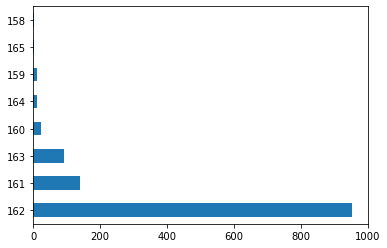

In [21]:
# 참고: 경기수 G 히스토그램
moneyball["G"].value_counts().plot.barh()
# 대부분 162 근처에 있음

In [22]:
############ 참고로 선형회귀분석의 다양한 통계적인 결과 수치를 원치 않는 경우#######
# sklearn을 이용해서 손쉽게 회귀분석 모델을 만들 수 있다.

from sklearn.linear_model import LinearRegression

# Fit 할 때 상수항을 따로 추가할 필요 없음
reg = LinearRegression().fit(moneyball[["RS", "RA"]], moneyball["W"])
print("r squared:", reg.score(moneyball[["RS", "RA"]], moneyball["W"]))
print("coefficients: ", reg.coef_)
print("intercept: ", reg.intercept_)

r squared: 0.8795651418768365
coefficients:  [ 0.10449347 -0.10460008]
intercept:  80.98045555972713


## STEP 6. 로지스틱회귀 모델 생성
- RS와 RA 두 독립변수로 플레이오프(Playoffs) 진출 여부를 결정하는 로지스틱회귀분석 모델을 생성해보시오.
- Confusion matrix, AUC, ROC 곡선을 이용해서 결과를 해석해 보시오.
- 참고
    - [Scikit learn confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    - [Model Evaluation Techniques for Classification models](https://towardsdatascience.com/model-evaluation-techniques-for-classification-models-eac30092c38b)
    - [Evaluating a Classification Model]()

### [풀이] 
- AUC 값이 0.7851347315324881로 성능이 크게 좋지는 않다.

---
>- 리뷰
   - p-value 모두 0.000 로 RS, RA 변수 모두 플레이오프 예측에 유의미한 결과를 얻었다고 볼 수 있겠습니다.
   - AUC를 보실 때는 0.5이상으로 한 것이 아니라 모든 데이터를 보셔야 겠습니다.
   - cut off한 결과는 confusion matrix로 보셔야해요!

In [23]:
RSRA = sm.add_constant(selected_df[['RS','RA']], has_constant='add')
playoffs = selected_df.Playoffs
logit_model = sm.Logit(playoffs,RSRA)
fit_logit_model = logit_model.fit(method = 'newton')
fit_logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.256725
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Playoffs   No. Observations:                 1232
Model:                          Logit   Df Residuals:                     1229
Method:                           MLE   Df Model:                            2
Date:                Wed, 15 Jul 2020   Pseudo R-squ.:                  0.4842
Time:                        22:34:35   Log-Likelihood:                -316.28
converged:                       True   LL-Null:                       -613.15
Covariance Type:            nonrobust   LLR p-value:                1.178e-129
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0982      0.980     -5.200      0.000      -7.020      -3.177
RS             0.0327      0.002     14.422      0.000       0.028       0.037
RA            -0.0300      0.002    -13.465      0.000      -0.034      -0.026
==============================================================================
"""

AUC: 0.7851347315324881


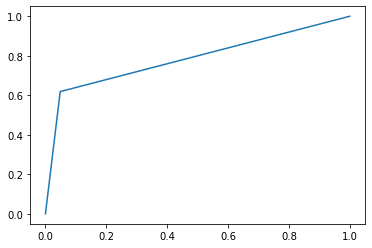

In [32]:
# sklearn ROC 패키지 제공
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve


pred_y = fit_logit_model.predict(RSRA) >= 0.5

def cut_off(y, threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>=threshold]=1
    Y[Y<threshold]=0
    return(Y.astype(int))

pred_Y = cut_off(pred_y, 0.5)
pred_Y

fpr, tpr, thresholds = metrics.roc_curve(playoffs, pred_Y, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)


In [66]:
# 참고로 선형회귀분석과 마찬가지로 sklearn을 이용해서 손쉽게 회귀분석 모델을 만들 수 있다.
# 위 결과와 비교해보시오.

from sklearn.linear_model import LogisticRegression

# Fit 할 때 상수항을 따로 추가할 필요 없음
reg = LogisticRegression().fit(moneyball[["RS", "RA"]], moneyball["Playoffs"])
print("mean accuracy:", reg.score(moneyball[["RS", "RA"]], moneyball["Playoffs"]))
print("coefficients: ", reg.coef_)
print("intercept: ", reg.intercept_)

mean accuracy: 0.885551948051948
coefficients:  [[ 0.03268497 -0.02999918]]
intercept:  [-5.09819896]


### Comments
- 로지스틱회귀분석은 주어진 독립변수의 공간을 선형으로 분리한다고 수학적으로 해석할 수 있다. 조금 더 자세히 설명하면 로지스틱회귀분석의 결과로 우리는 아래 식의 계수들 $\alpha_1, \alpha_2, \beta$를 얻었다. 플레이오프의 진출 여부를 0 ~ 1사이의 확률 값으로 출력하는 식이 로지스틱회귀분석의 결과이다. 여기서 진출 여부의 판단 기준을 $1/2$로 한다고 가정해보자(일반적으로 $1/2$ 확률로 판단하지만 모델이나 상황에 따라서 조절할 수도 있다).

$$
\text{Playoffs} = \frac{1}{1 + e^{(\alpha_1 RS + \alpha_2 RA + \beta)}}
$$

- 왼쪽 플레이오프 진출 확률을 1/2로 두고 식을 정리하면 다음과 같다.

$$
\alpha_1 RS + \alpha_2 RA + \beta = 0
$$

- 결과적으로 위 식을 만족하는 RS와 RA 값들은 아래와 같은 빨간색 선과 같은 직선의 형태를 띤다. 직선(선형)을 기준으로 한쪽 영역은 플레이오프 진출 못함, 반대쪽은 플레이오프 진출함으로 판단되는 것이다(물론 로지스틱회귀분석모델의 판단). 

![](https://mjgim-fc.s3.ap-northeast-2.amazonaws.com/logistic.png)


- 이처럼 로지스틱회귀분석은 주어진 독립변수 공간을 선형으로 분리해서 이진 분류하는 방식이기 때문에 XOR 문제를 해결하기 어려운 것이다(XOR은 선형으로 해결 불가능). 그림 출처: https://web.stanford.edu/~jurafsky/slp3/7.pdf

![](https://mjgim-fc.s3.ap-northeast-2.amazonaws.com/xor.png)

In [75]:
fit_logit = fit_logit_model

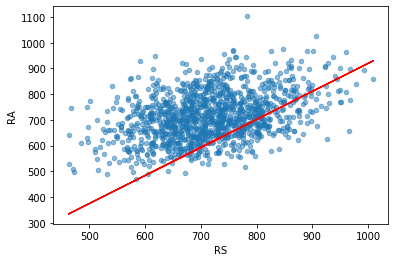

In [76]:
line_x = moneyball["RS"]

line_y = (- fit_logit.params["RS"] * moneyball["RS"]  - fit_logit.params["const"] ) \
          / fit_logit.params["RA"]

moneyball.plot.scatter(x = "RS", y = "RA", alpha = 0.5)
plt.plot(line_x, line_y, "r")

## STEP 7. 변수 선택법으로 로지스틱회귀분석 정확도 올리기
- RS, RA, OBP, SLG, BA, G을 독립변수를 사용해서(상수항 포함) 플레이오프 진출 여부를 결정하는 로지스틱회귀분석 모델을 만들어 보시오.
- 후진소거법으로 최적의 독립변수를 찾아 보시오(AIC 값이 크게).

### [풀이] 
- 
-['BA', 'OBP', 'RA', 'RS', 'SLG', 'const'] 일때 aic가 710.82로 가장 낮다.

In [77]:
some_data = sm.add_constant(selected_df[['RS','RA', 'OBP', 'SLG', 'BA', 'G']], has_constant='add')
playoffs = selected_df.Playoffs
logit_model_some = sm.Logit(playoffs,some_data)
fit_logit_model_some = logit_model_some.fit(method = 'newton')
fit_logit_model_some.summary()

Optimization terminated successfully.
         Current function value: 0.253002
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Playoffs   No. Observations:                 1232
Model:                          Logit   Df Residuals:                     1225
Method:                           MLE   Df Model:                            6
Date:                Sun, 12 Jul 2020   Pseudo R-squ.:                  0.4916
Time:                        01:43:33   Log-Likelihood:                -311.70
converged:                       True   LL-Null:                       -613.15
Covariance Type:            nonrobust   LLR p-value:                5.493e-127
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0517     29.004     -0.243      0.808     -63.899      49.795
RS             0.0230      0.004      5.311      0.000       0.015       0.031
RA            -0.0311      0.002    -13.331      0.000      -0.036      -0.026
OBP           44.8459     18.453      2.430      0.015       8.679      81.013
SLG           18.9428      8.276      2.289      0.022       2.722      35.163
BA           -22.7653     15.575     -1.462      0.144     -53.292       7.761
G             -0.0411      0.173     -0.238      0.812      -0.380       0.298
==============================================================================
"""

AUC: 0.7759258644720249


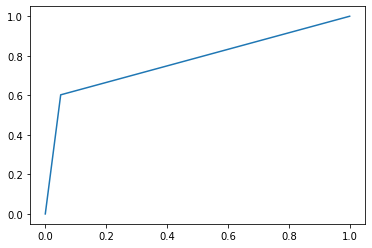

In [78]:
pred_y = fit_logit_model_some.predict(some_data)

def cut_off(y, threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

pred_Y = cut_off(pred_y, 0.5)
pred_Y
fpr, tpr, thresholds = metrics.roc_curve(playoffs, pred_Y, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [117]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model


In [116]:
predictors = some_data.columns.difference(['const'])
backward(X=some_data, y= playoffs, predictors = predictors)

Processed  6 models on 5 predictors in 0.014998674392700195
Selected predictors: ['BA', 'OBP', 'RA', 'RS', 'SLG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001C4A076BD68>


model    <statsmodels.regression.linear_model.Regressio...
AIC                                                 710.82
Name: 4, dtype: object

---
>- 리뷰
   - 잘 해주셨는데 이를 반복해서 실행해 가장 낮은 AIC를 찾는 부분이 조금 문제가 있어 보입니다.
   - 이에 대해 예제 코드를 드리오니 참조하시어 복습하는데 도움이 되었으면 좋겠습니다.  
   
       def backward_model(X, y):
            Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
            predictors = X.columns.difference(['const'])
            Bmodel_before = processSubset(X,y,predictors)['AIC']
            while (len(predictors) > 1):
                Backward_result = backward(X=X, y= y, predictors = predictors)
                if Backward_result['AIC'] > Bmodel_before:
                    break
                Bmodels.loc[len(predictors) - 1] = Backward_result
                predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
                Bmodel_before = Backward_result['AIC']
                predictors = [ k for k in predictors if k != 'const']

            return (Bmodels['model'].dropna().iloc[0])


## 참고
- 통계 라이브러리에 특화(?)된 R에서는 회귀분석 모델 생성, 변수선택법, VIF 등 통계분석을 쉽게 수행할 수 있다.
- 위에서 수행했던 내용을 R로 실행한 내용입니다.
- [R vs Python 회귀분석모델](https://s3.ap-northeast-2.amazonaws.com/mjgim.assets/2.+Regression+in+R.html)